In [3]:
# make the jupyter notebook interactive
%matplotlib widget

# Single module

You first need to generate a configuration, which will then be turned into a viewer. 

the most basic information is:
- a numpy file
- channel names
- location for the channels 
- signal frequency

it allows you to scroll left and right trough the image

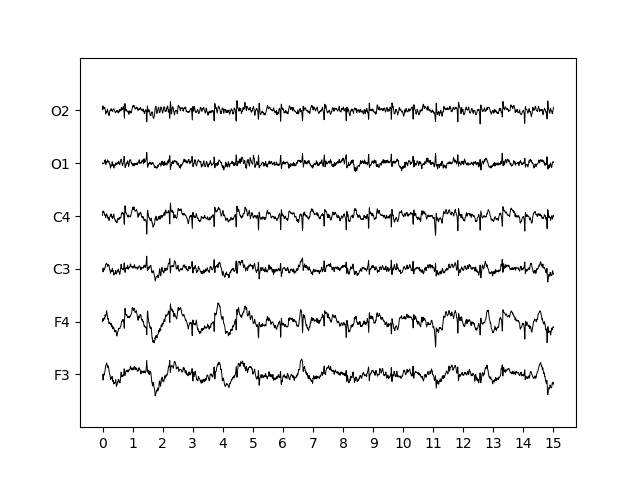

In [7]:
import matplotlib.pyplot as plt
from BIOViewer.viewers import ContinuousViewer
from BIOViewer.config import ContinuousConfig

path_signal = 'example.npy'
display_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
y_locations = [0,100,200,300,400,500]
Fq_signal = 128

config = ContinuousConfig(path_signal,Fq_signal,display_channels,y_locations, y_pad = 100)
ContinuousViewer(configs=[config])
ContinuousConfig()

# Multi window

this is where the BIOViewer shows most utility. \
You can build a multiwindow viewer! \
this is useful when ...
* parts of the signal are stored at different locations
* the signals have different frequencies
* you want to display the signal with different transformations applied


to show you how it works we are going to plot the same signal twice

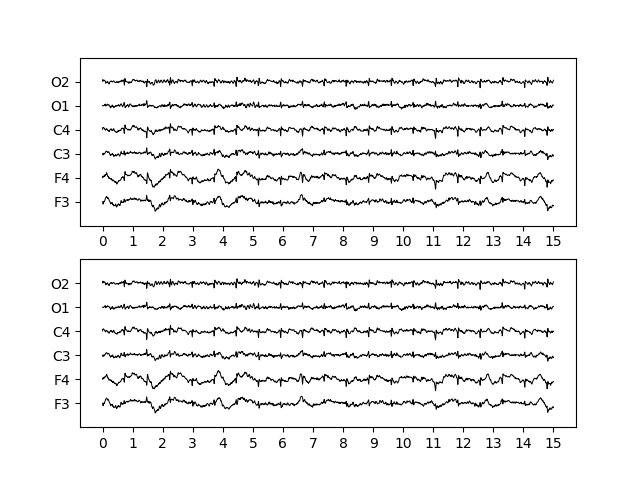

In [8]:
# general information
path_signal = 'example.npy'
display_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
Fq_signal = 128
title = 'Test'

config0 = ContinuousConfig(path_signal,Fq_signal,display_channels,y_locations = [0,100,200,300,400,500],y_pad=100)
config1 = ContinuousConfig(path_signal,Fq_signal,display_channels,y_locations = [0,100,200,300,400,500], y_pad = 100)
ContinuousViewer(configs=[config0,config1])
ContinuousConfig()

# Transformations
in many cases we want to apply functions to the signal before it is displayed. \ 
this is done via transformations.
Note that 
In the example below we want to display two channels per window. 


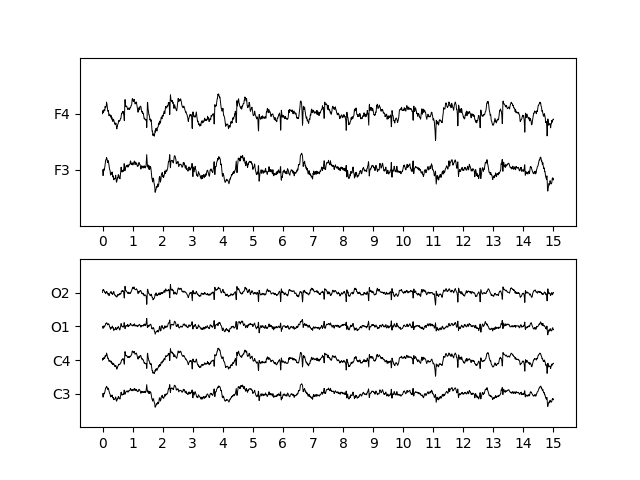

In [9]:
from BIOViewer.transforms import FilterChannels
# general information
path_signal = 'example.npy'
storage_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
Fq_signal = 128
title = 'Test'


display_channels_0 = ['F3','F4']
display_channels_1 = ['C3','C4','O1','O2']
filter0 = FilterChannels(storage_channels,display_channels_0)
filter1 = FilterChannels(storage_channels,display_channels_1)
config0 = ContinuousConfig(path_signal,Fq_signal,display_channels_0,y_locations=[0,100],transforms = filter0, y_pad = 100)
config1 = ContinuousConfig(path_signal,Fq_signal,display_channels_1,y_locations=[0,100,200,300],transforms = filter1, y_pad = 100)
ContinuousViewer(configs=[config0,config1])
ContinuousConfig()